In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import random
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

# Extract dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


# Create custom min-max scaler
def min_max_scaler(train_data, test_data, new_min=0, new_max=0, scale=0, bias=0):
    min_value = 0 if new_min == new_max else min([train_data.min(), test_data.min()]) 
    max_value = 0 if new_max == new_min else max([train_data.max(), test_data.max()])
    scale = (new_max - new_min) / (max_value - min_value) if scale == 0 else scale
    bias = new_min if bias == 0 else bias
    scaled_dataset = (train_data - min_value) * scale + bias, (test_data - min_value) * scale + bias
    return scaled_dataset

def get_scale(train_data, test_data, new_min, new_max):
    min_value = min([train_data.min(), test_data.min()])
    max_value = max([train_data.max(), test_data.max()])
    scale = (new_max - new_min) / (max_value - min_value)
    bias = new_min
    return scale, bias
    
    
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    
    fig, ax = plt.subplots(figsize=figsize)
    
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
        
        
    ax.set(title="Confusion matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    
    
    threshold = (cm.max() + cm.min()) / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

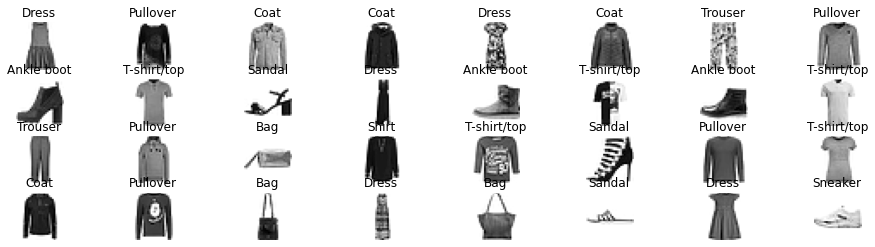

In [5]:
plt.figure(figsize=(16, 4))
for _ in range(8*4):
    ax = plt.subplot(4, 8, _+1)
    choice = random.choice(range(len(train_data)))
    plt.imshow(train_data[choice], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[choice]])
    plt.axis(False)

In [6]:
# Scale data to use it with ELU activation
scale, bias = get_scale(train_data, test_data, -1, 5)
train_data, test_data = min_max_scaler(train_data, test_data, scale=scale, bias=bias)

* Input shape = train_data.shape = image resulution X number of color channels
* Output shape = len(class_names)
* Loss function = tf.keras.losses.CategoricalCrossentropy for one-hot encoded labels or SparseCategoricalCrossentropy for integer labels
* Output layer activation = Softmax

In [7]:
tf.random.set_seed(42)
# elu = tf.keras.activations.elu

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(40, activation="elu"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs=15,
                        batch_size=200,
                        validation_data=(test_data, test_labels))


Epoch 1/15
300/300 [==============================] - 1s 2ms/step - loss: 0.7775 - accuracy: 0.7837 - val_loss: 0.5142 - val_accuracy: 0.8313
Epoch 2/15
300/300 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8527 - val_loss: 0.4358 - val_accuracy: 0.8499
Epoch 3/15
300/300 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.8671 - val_loss: 0.4074 - val_accuracy: 0.8563
Epoch 4/15
300/300 [==============================] - 0s 1ms/step - loss: 0.3542 - accuracy: 0.8750 - val_loss: 0.3868 - val_accuracy: 0.8633
Epoch 5/15
300/300 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8824 - val_loss: 0.3752 - val_accuracy: 0.8658
Epoch 6/15
300/300 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 0.8855 - val_loss: 0.3691 - val_accuracy: 0.8685
Epoch 7/15
300/300 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8900 - val_loss: 0.3582 - val_accuracy: 0.8754
Epoch 

<AxesSubplot:>

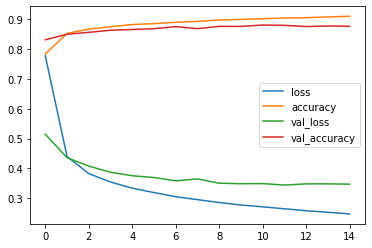

In [8]:
pd.DataFrame(history_1.history).plot()

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(40, activation="elu"),
    tf.keras.layers.Dense(40, activation="sigmoid"),
    tf.keras.layers.Dense(10, activation="softmax")
])


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))


find_lr_history = model_2.fit(train_data, train_labels,
                            epochs=40,
                            batch_size=200,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_scheduler]
                           )

lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [15]:
y_probs = model_1.predict(test_data)

(array([4.1347139e-05, 2.7895856e-05, 3.7405625e-06, 1.8383052e-04,
        4.5763331e-06, 1.2905489e-03, 2.7397813e-05, 1.9433862e-03,
        3.2541760e-05, 9.9644476e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

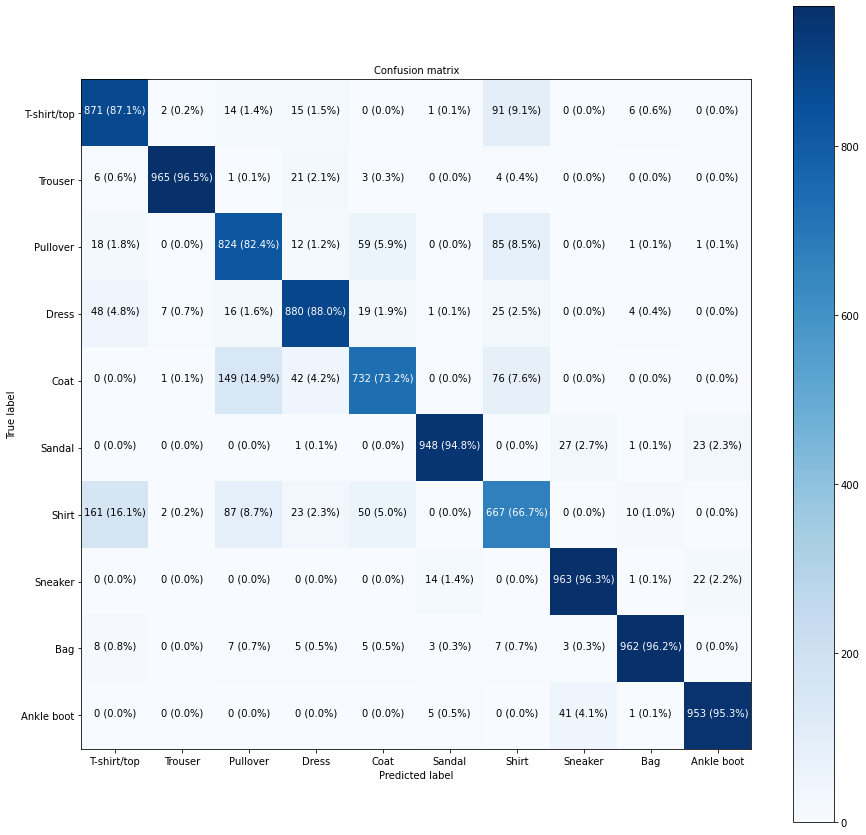

In [30]:
y_pred = y_probs.argmax(axis=1)
plot_confusion_matrix(y_true=test_labels, y_pred=y_pred, classes=class_names.values(), figsize=(15, 15), text_size=10)